In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display


## **Overview**

- Long-term goal: construct a Kagome lattice in lammps 
- For now: investigate basic pairwise interactions using simple potentials (currently: LJ)
- Study energy behavior along a specific particle path (relative orientations)


**1. Current Setup:**  
Two particles, each with a center and two patches

Particle i and particle j, where:  
ipl = left patch of particle i,   
ipr = right patch of particle i

(ipl $\quad$ i $\quad$ ipr)      $\; \qquad$     (jpl $\quad$ j $\quad$ jpr)


**2. Interaction types:**  
At constant center-center distance
- center-center (repulsive)
- center-patch (repulsive)
- patch-patch (attractive)
 
Idea (for later): repeat the simulation at different distances to observe how the interaction energy changes


**3. Path:**  
Relative motion of particle j around particle i on a circular arc

Specific orientations are investigated in two steps:
1. Polar-polar $\rightarrow$ equatorial-equatorial
2. Equatorial-equatorial $\rightarrow$ equatorial-polar

In each part, the total interaction energy is computed and plotted along the path


### **Be careful!!**
np.sin() and np.cos() needs the angle in radians!! -> np.radians()

In [32]:
# global variables:
CONST_sigma = 1.0  # float, diameter of a particle 
CONST_sigma_pp = 0.1   # shortest distance between the surface of the particles is constant = sigma of patch-patch interactions
CONST_alpha_lst = np.linspace(0, 90, 181)     # alpha list, type np.array, angles between 0 and 90 degrees
CONST_r_ij = 0.5*(CONST_sigma + CONST_sigma_pp * 2**(1/6))  # float; distance between the particle centers
CONST_r_ij_lst = np.full(len(CONST_alpha_lst), CONST_r_ij)  # np.array; distance between the particle centers
print('CONST_r_ij =', CONST_r_ij)

CONST_r_ij = 0.5561231024154687


In [33]:
def my_plot(x,y,label='My Plot'):
    #plt.plot(alpha_lst, pot_energy, label='LJ potential')
    plt.figure(figsize=(3.2,2.4))
    plt.plot(x, y)
    plt.title(label)
    return plt.show()

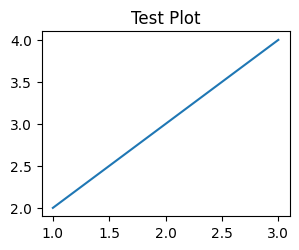

In [34]:
my_plot([1,2,3], [2,3,4], label='Test Plot')

In [35]:
def lj_cut(r, sigma=1.0, epsilon=1.0, cutoff=2.5):
    """
    Computes the Lennard-Jones potential with a cutoff.

    Parameters:
        r (float): Distance between particles
        sigma (float): Finite distance at which the inter-particle potential is zero
        epsilon (float): Depth of the potential well
        cutoff (float): Distance beyond which the potential is zero

    Returns:
        float: The Lennard-Jones potential at distance r (0 if r >= cutoff)
    """
    if r < cutoff:
        return 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)
    else:
        return 0.0

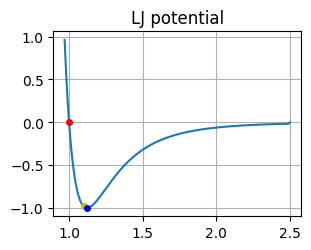

In [36]:
r_lj_plot = np.linspace(0.97, 2.5, 150)
lj_eng = np.array([])
for r in r_lj_plot:
    lj_eng = np.append(lj_eng, lj_cut(r))
plt.figure(figsize=(3.2, 2.4))
plt.plot(r_lj_plot, lj_eng)
plt.title('LJ potential')
#plt.axhline(0, color='black', linewidth=1)  # x-axis
#plt.axvline(0, color='black', linewidth=1)  # y-axis
plt.plot(1.0, 0.0, 'ro', markersize= 4, label='point (1.0, 0.0)')
plt.plot(1.1, lj_cut(1.1), 'yo', markersize= 4, label='point (1.1, lj_cut(1.1))')
plt.plot(2**(1/6), lj_cut(2**(1/6)), 'bo', markersize= 4, label='point (2**(1/6), lj_cut(2**(1/6)))')
plt.grid(True)
plt.show()

# for the red and yellow points in the graph, see the two graphs below
# because these are the points for distances r_ij = 1.0 and r_ij = 1.1

# **1. Polar-Polar $\rightarrow$ Equatorial-Equatorial**

## **Center-Center:** 

$ r_{ij} $ ... Distance between the two centers i and j is constant   
$ \sigma $ ... Particle diameter  
$ \sigma_{pp} $ ... minimal patch-patch distance = minimal possible distance between particle surfaces  

The constant distance chosen for the particle centers i and j is:   
$$ 
r_{ij} = \sigma + \sigma_{pp} \cdot 2^{1/6} 
$$  

The goal of these simulations is to observe chain formation, which becomes possible only due to the attractive patch–patch interaction. Therefore, the chosen, fixed distance between particle centers corresponds to the configuration where the patches are positioned at the minimum of the interaction potential.


In [37]:
def compute_center_center(potential, r_ij=CONST_r_ij, alpha_lst=CONST_alpha_lst):
    epsilon = 1.0
    sigma = 1.0
    cutoff = 2**(1/6)

    pot_energy = np.full(len(alpha_lst), potential(r_ij, sigma=sigma, epsilon=epsilon, cutoff=cutoff))

    #pot_energy = np.array([]) # will append energy for every alpha index of the alpha_lst,
    #                           so len(pot_energy) == len(alpha_lst)

    #for alpha_idx in range(len(alpha_lst)):
    #    pot_energy = np.append(pot_energy, lj_cut(r_ij[alpha_idx], sigma=sigma, epsilon=epsilon, cutoff=cutoff))

    # np.append(np.array where you want to append, value that will be appended)
    # in this case, r_ij[alpha_idx] because r_ij is an array with every element being 1.01.
    # so i could just insert 1.01 instead because it stays constant. but if i want to use a different r like 1.0,
    # it's better to 

    #return (r_ij, pot_energy)
    return pot_energy


#### Potential Energy for LJ-cut at $ r_{ij} = 1.1 $:

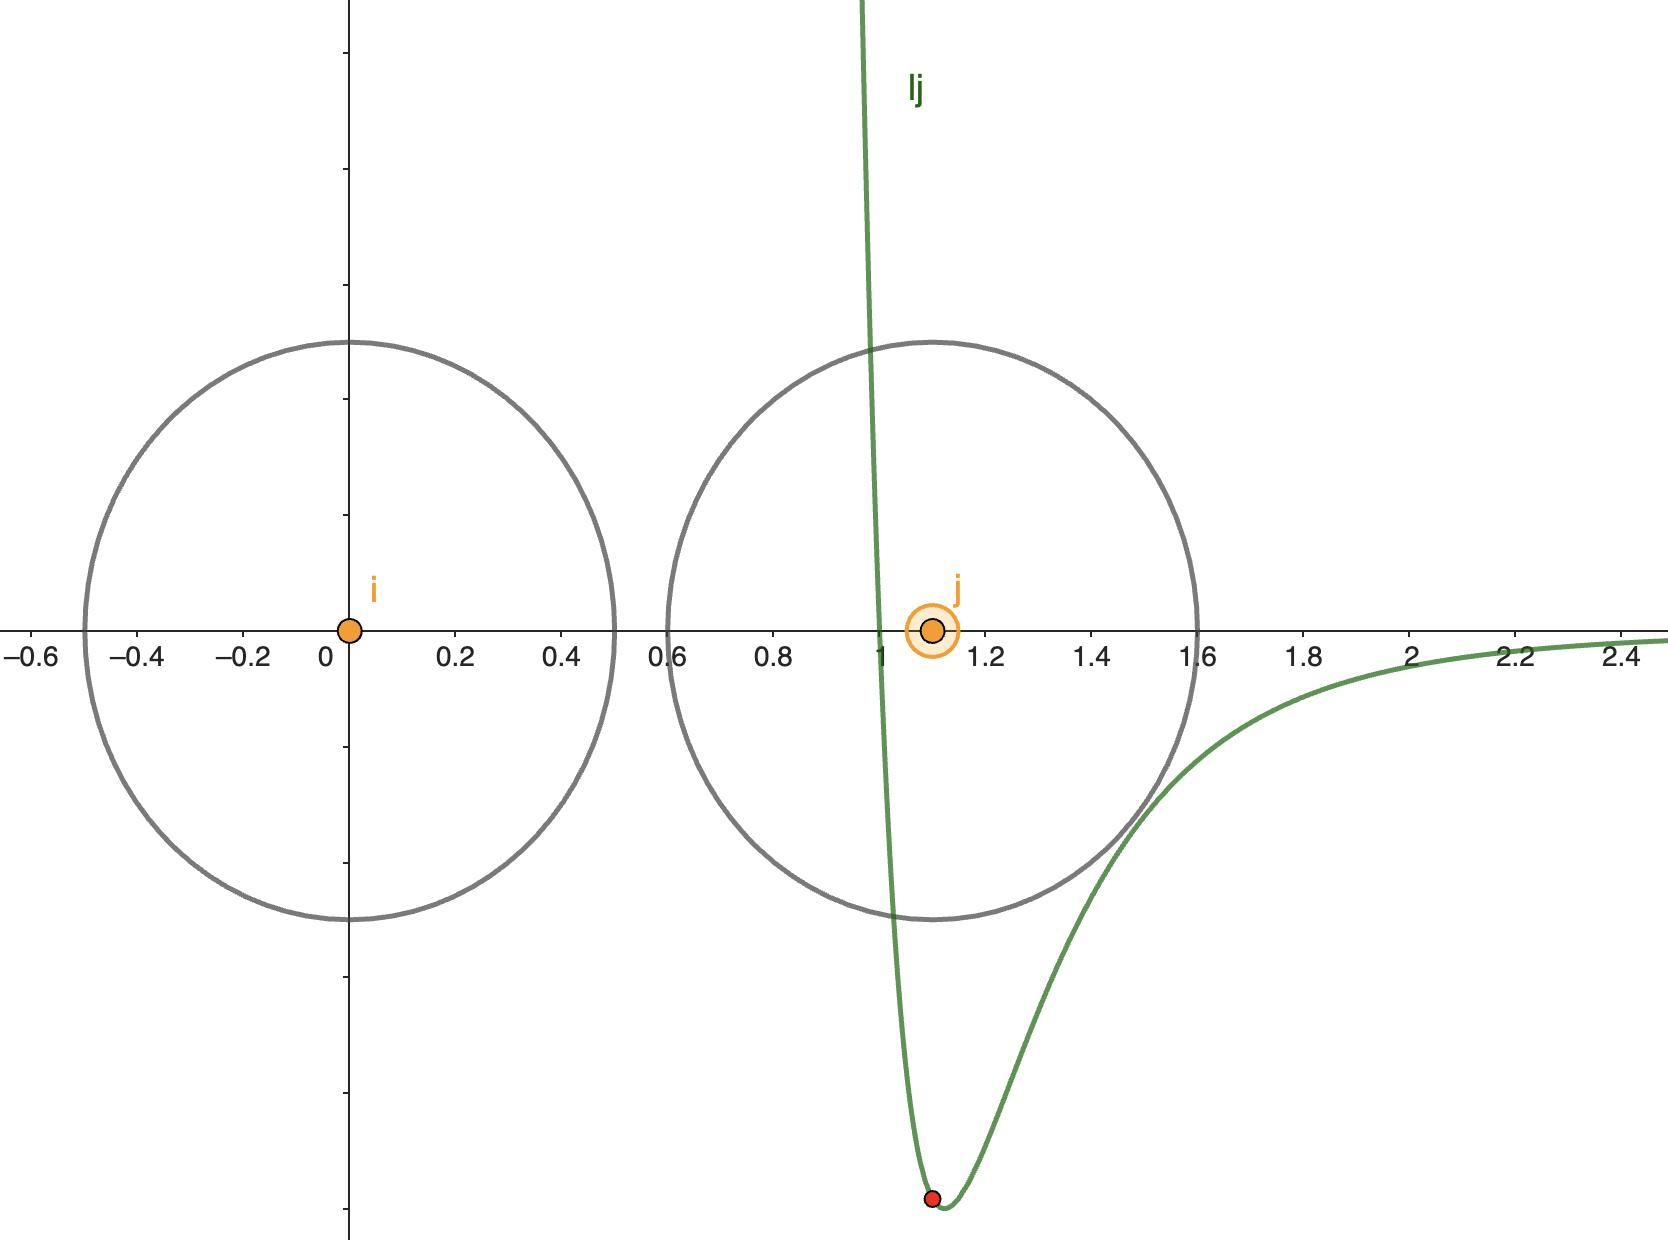

In [38]:
display(Image(filename='pictures_for_nb/lj_with_particles_rij=1.1.png', width=400))

V_LJ(r = 1.1) = -0.9833724493736826


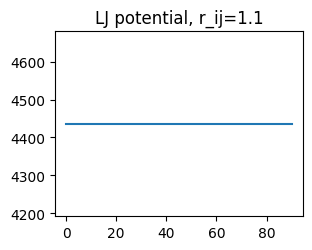

In [39]:
# plot for r_ij = 1.1 = CONST_r_ij, center-center
pot_energy = compute_center_center(lj_cut) # default value for r_ij = CONST_r_ij = 1.1
print('V_LJ(r = 1.1) =', lj_cut(1.1, sigma=1.0, epsilon=1.0, cutoff=2**(1/6)))
my_plot(CONST_alpha_lst, pot_energy, label='LJ potential, r_ij=1.1')


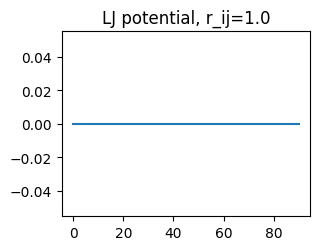

In [40]:
# plot for r_ij = sigma = 1.0, center-center
# sigma = 1.0 = CONST_sigma, float
my_plot(CONST_alpha_lst, compute_center_center(lj_cut, r_ij=CONST_sigma), label='LJ potential, r_ij=1.0')

**Expected Outcome:**  
$$ if \; r_{ij} = \sigma = 1.0 \\ V_{LJ}(r_{ij} = 1.0) = 0.0 $$

# **Center-Patch:**  
4 center-patch interactions: 
- center i with jpl and jpr (2 interactions)
- center j with ipl and ipr (2 interactions)  

for each interaction, there is a distance:  
$ r_{i,jpl} $ ... distance between center i, and the left patch of particle j  

because of symmetry:
- $ r_{i,jpl} = r_{j,ipr} $
- $ r_{i,jpr} = r_{j,ipl} $
- see pictures below:

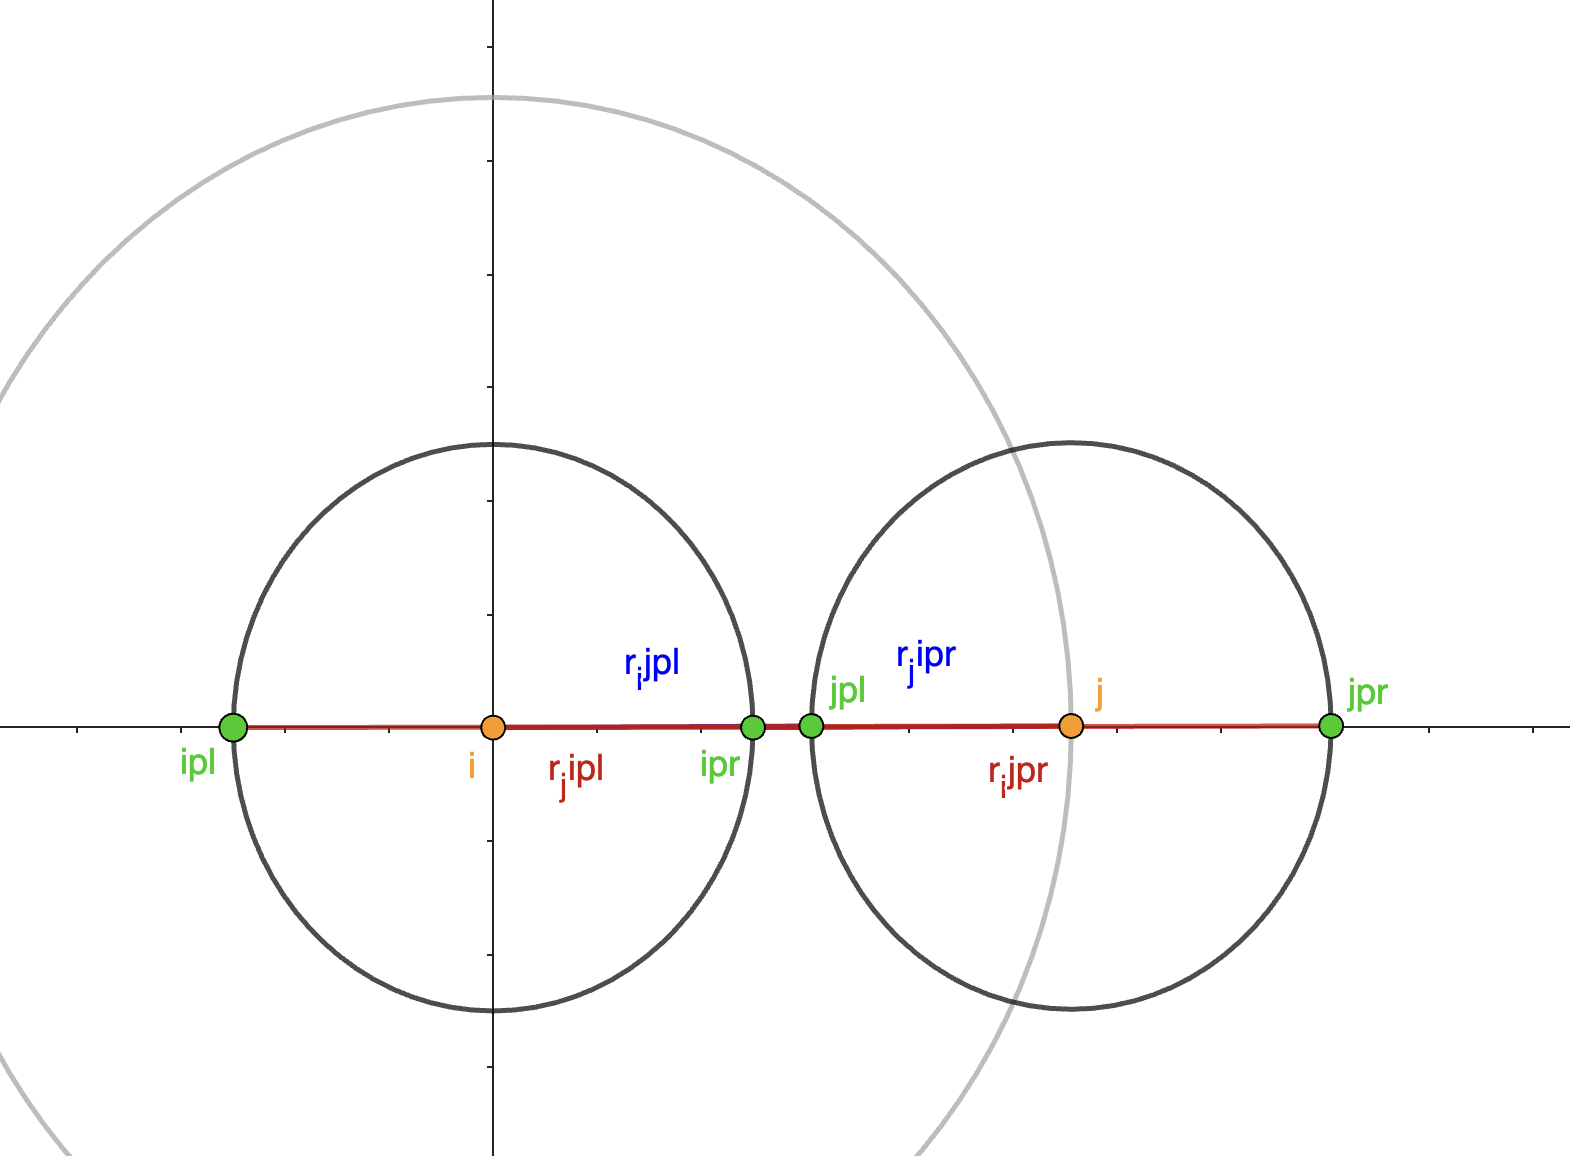

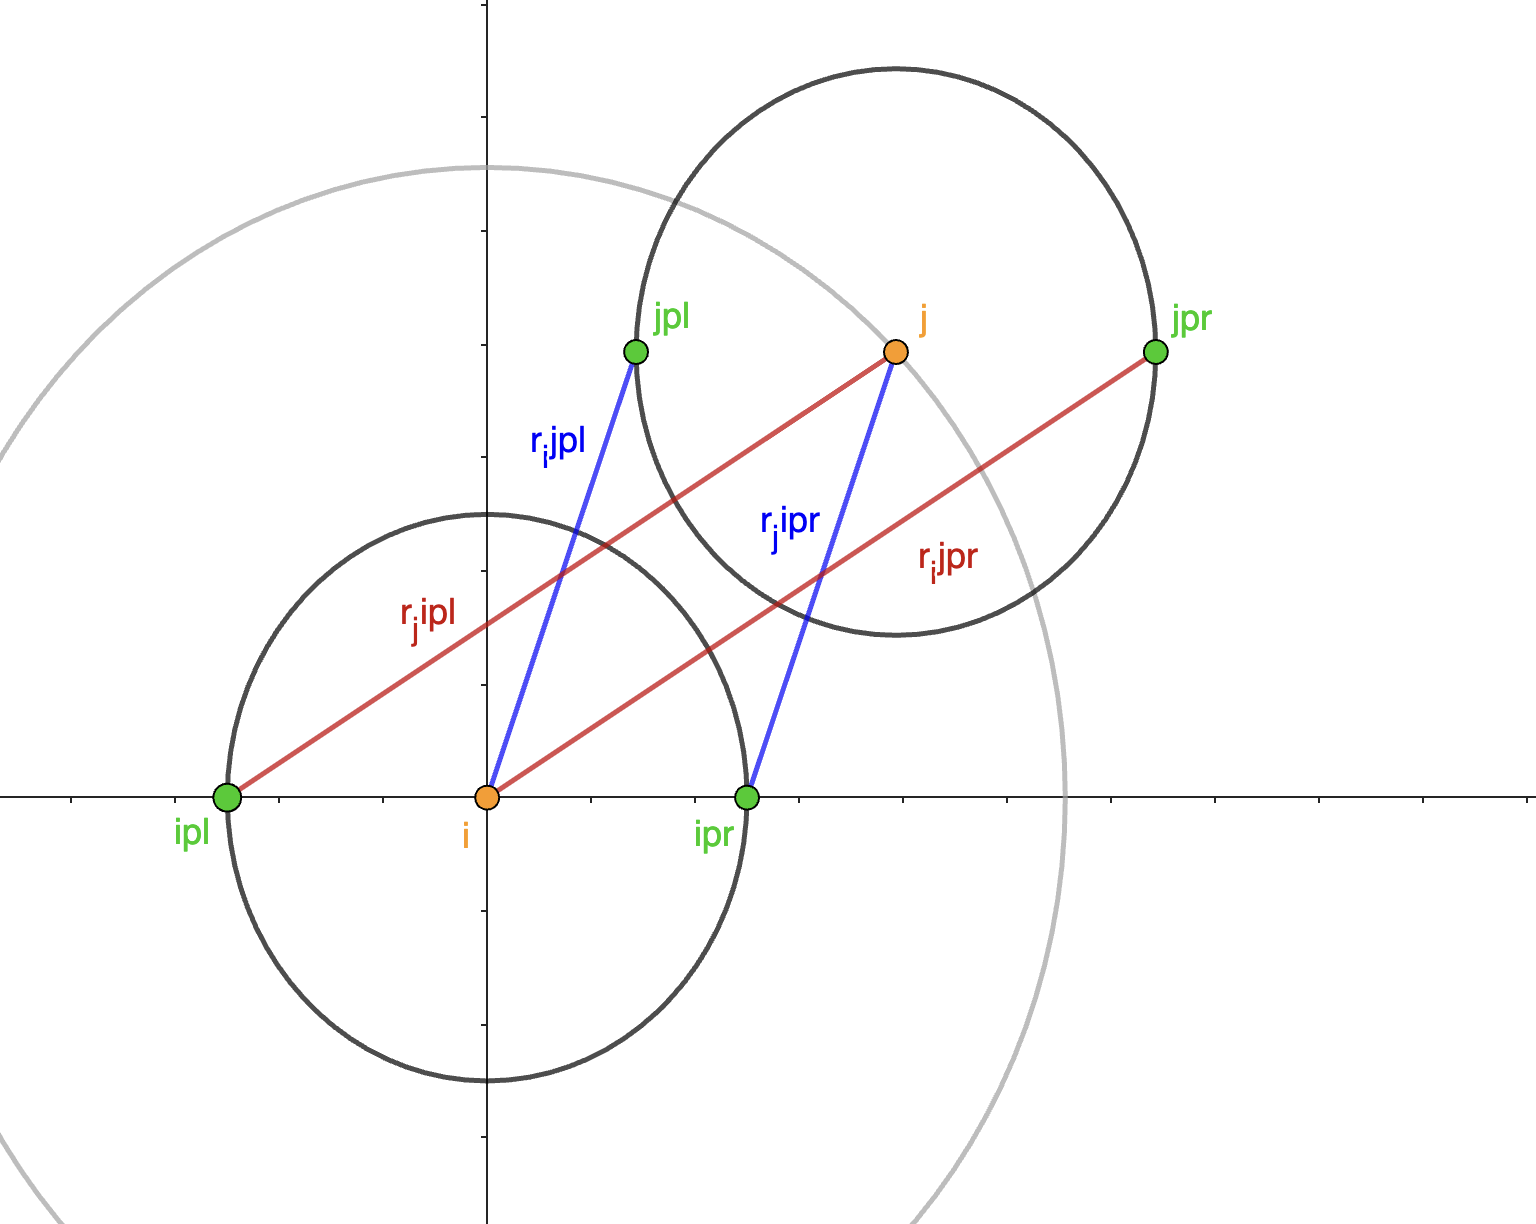

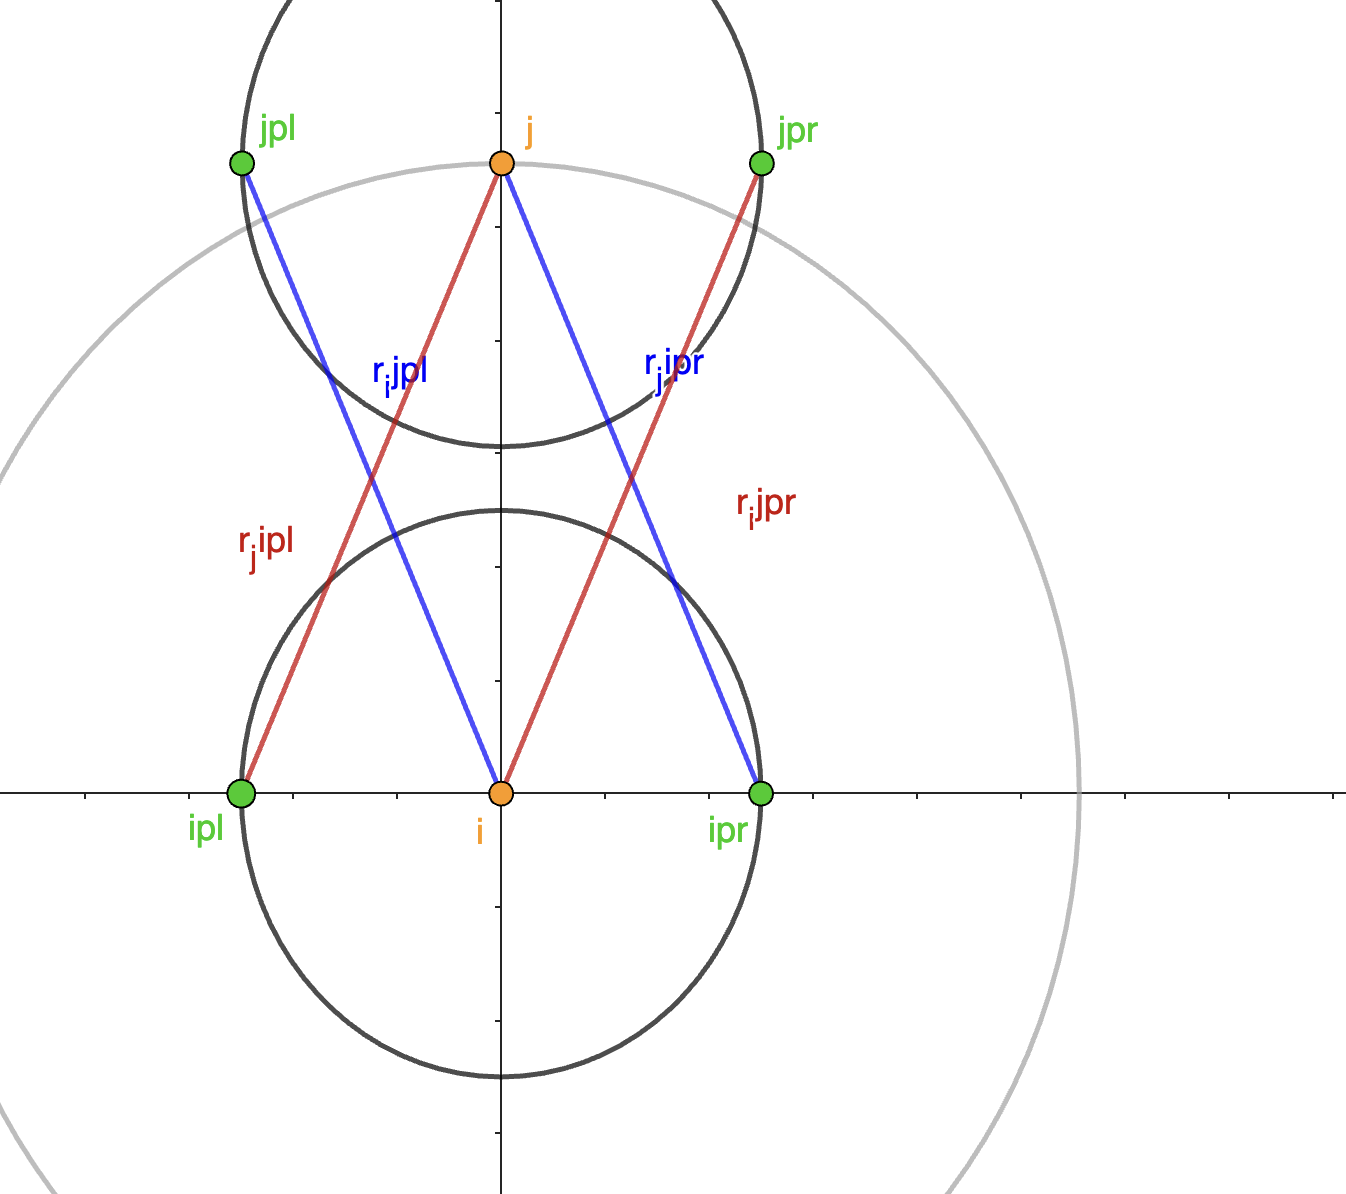

In [41]:
display(Image(filename='pictures_for_nb/center_patch_0deg.png', width=400))
display(Image(filename='pictures_for_nb/center_patch_45deg.png', width=400))
display(Image(filename='pictures_for_nb/center_patch_90deg.png', width=400))

In [42]:
r_i_jpl = np.array([])
r_i_jpr = np.array([])
offset_left = np.array([ -0.5 * CONST_sigma, 0.0])  # offset for the jpl: -0.5*sigma (x-val)
offset_right = np.array([ 0.5 * CONST_sigma, 0.0])  # offset for the jpr: +0.5*sigma (x-val)
for alpha in CONST_alpha_lst:
    vect_r_ij = CONST_r_ij * np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])  
    # CONST_r_ij ... distance of part. centers
    # np.cos() & np.sin() needs the angle in radians!!
    r_i_jpl = np.append(r_i_jpl, np.linalg.norm(vect_r_ij + offset_left))
    r_i_jpr = np.append(r_i_jpr, np.linalg.norm(vect_r_ij + offset_right))

r_j_ipr = r_i_jpl
r_j_ipl = r_i_jpr   # just a pointer, also ""easier" to read/understand


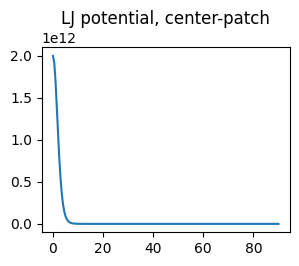

In [43]:
def compute_center_patch(potential):
    epsilon = 1.0
    sigma = 0.5
    cutoff = 0.5 * 2**(1/6)
    pot_energy = np.array([]) # potential energy summed over all 4 center-patch interactions

    for r_i_jl, r_i_jr, r_j_il, r_j_ir in zip(r_i_jpl, r_i_jpr, r_j_ipl, r_j_ipr):
        pot_energy_i_jl = potential(r_i_jl, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_i_jr = potential(r_i_jr, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_j_il = potential(r_j_il, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_j_ir = potential(r_j_ir, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        total_pot_energy = pot_energy_i_jl + pot_energy_i_jr + pot_energy_j_il + pot_energy_j_ir
        pot_energy = np.append(pot_energy, total_pot_energy)
        #pot_energy = np.append(pot_energy, pot_energy_i_jl)

    return pot_energy

my_plot(CONST_alpha_lst, compute_center_patch(lj_cut), label='LJ potential, center-patch')


**Discussion of the outcome:**  
- one can see the cutoff around: $ \quad \alpha_{cut} \approx 20° $
- for the center-patch interactions, the cutoff is at: $ \quad r_{cutoff} = 0.5 \cdot 2^{1/6} $   
- this cutoff corresponds to the angle:  
 

$$
|r_{i,jpl}| = r_{\text{cutoff}} = 0.5 \cdot 2^{1/6} = \left\lVert 1.01 \cdot 
\begin{pmatrix}
\cos(\alpha) - 0.5 \\
\sin(\alpha)
\end{pmatrix}
\right\rVert = \sqrt{1.01^{2} \cdot \left[(\cos(\alpha)-0.5)^{2} + \sin^{2}(\alpha)\right]}
$$
$$
 \Rightarrow \qquad \alpha_{cut} \approx 19.74151°
$$

- due to symmetry, the same angle applies to $ \; r_{i,jpr} $

- the cutoff is there, because the parameters chosen for the center-patch interactions (LJ) are:
    1. $ \epsilon = 1.0 $ ... potential well depth
    2. $ \sigma = 0.5 $ ... distance at which the potential is zero
    3. $ r_{cutoff} = 0.5 \cdot 2^{1/6} $ ... interaction range

- $ \sigma = 0.5 $, while $ \sigma = 1.0 $ for the center-center interaction due to geometric reasons, see picture below
- $ r_{cutoff} = 0.5 \cdot 2^{1/6} $: the cutoff is chosen to be at the well depth, so the interaction is purely repulsive; the factor 0.5 is a result of the geometry and is directly linked to $ \sigma$.

$ \\ $

- regarding the pictures below:  

The Lennard-Jones potential can be understood by considering a pair of particles: one is fixed at the origin, while the other is placed at a distance r from it.

The potential curve reflects how the interaction energy changes with distance. If the particles are brought closer than the point where the potential crosses zero, a large amount of energy is required — the repulsive forces dominate. As the particles approach each other from larger distances, they are attracted until they reach the minimum of the potential well. This minimum corresponds to the optimal equilibrium position, where the attractive and repulsive forces balance.

Moving the particles further apart from this minimum again requires energy, as the attraction becomes weaker. However, as long as the particle is beyond the position of steepest descent in the potential, it will be drawn back toward the minimum — the point of lowest energy.

In this particle system, the patches are ignored for center–center interactions. The Lennard-Jones potential is applied in its standard form, assuming two spherically symmetric particles with no angular dependence.

For center–patch interactions, however, a small trick is applied: although the interaction is still mathematically treated as if it occurred between the centers (see figure below), the value of $\sigma$ is reduced by half. This effectively allows the center of the approaching particle to come closer — specifically, close enough for the patch to just touch the surface of the other particle. Since the particle radius is defined as 0.5, this contact point represents the physical limit of how close the patch can get without requiring energy to overcome repulsive forces.

The potential minimum is chosen so that the center–center distance exactly corresponds to the configuration where the patch sits at the optimal interaction distance — i.e., right at the minimum of the potential.

In both the center–center and center–patch interactions, the cutoff is chosen to lie precisely at the position of the potential minimum. As a result, both interactions are purely repulsive.




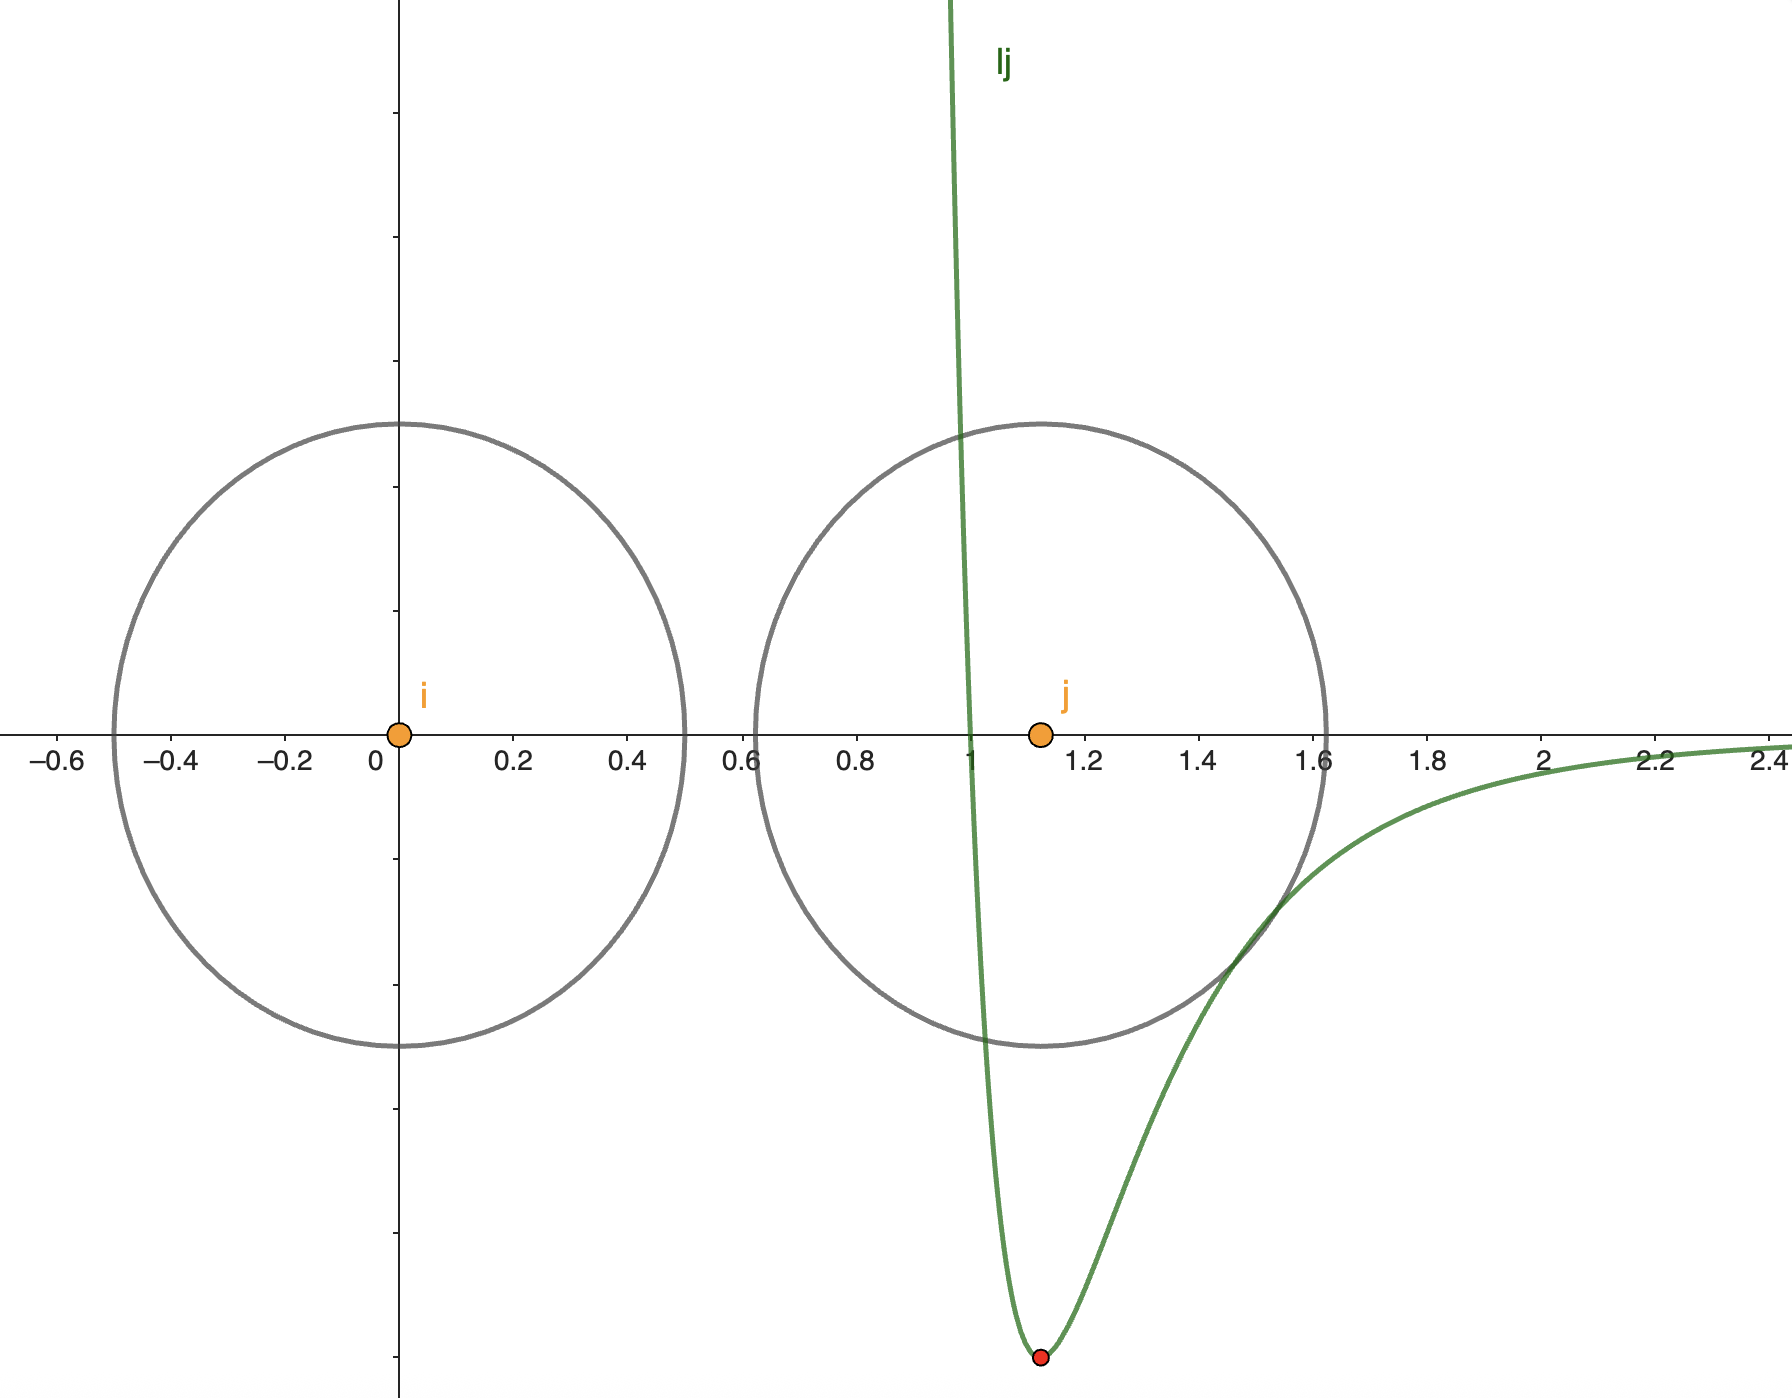

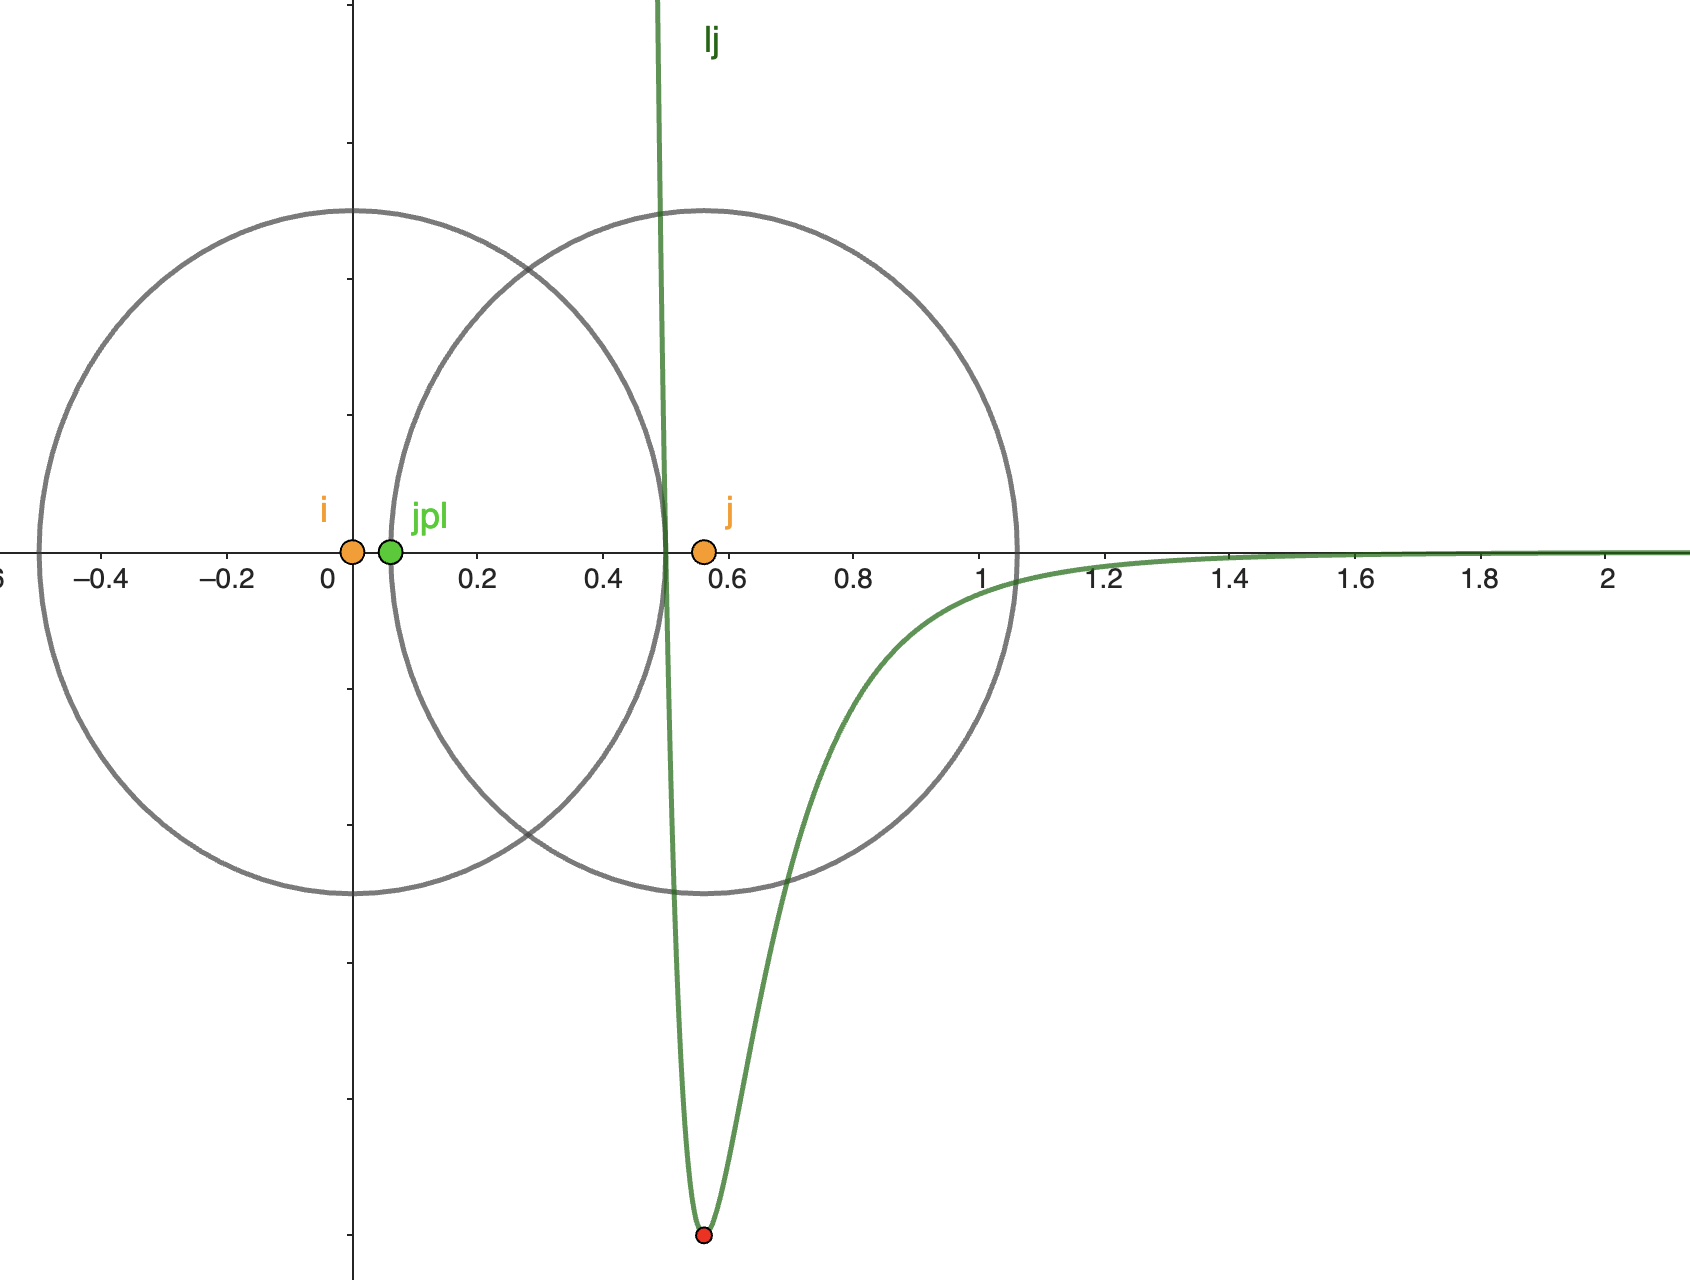

In [48]:
display(Image(filename='pictures_for_nb/lj_with_particles_sigma=1.0.png', width=400))
display(Image(filename='pictures_for_nb/lj_with_particles_sigma=0.5.png', width=400))


# **Patch-Patch:** 
4 patch-patch interactions: 
- patch ipl with jpl and jpr (2 interactions)
- patch ipr with jpl and jpr (2 interactions) 

for each interaction, there is a distance:  
$ r_{ipl,jpl} $ ... distance between the left patch of particle i, and the left patch of particle j  

because of symmetry:
- $ r_{ipl,jpl} = r_{ipr,jpr} $ = CONST_r_ij = 1.01
- see picture below:


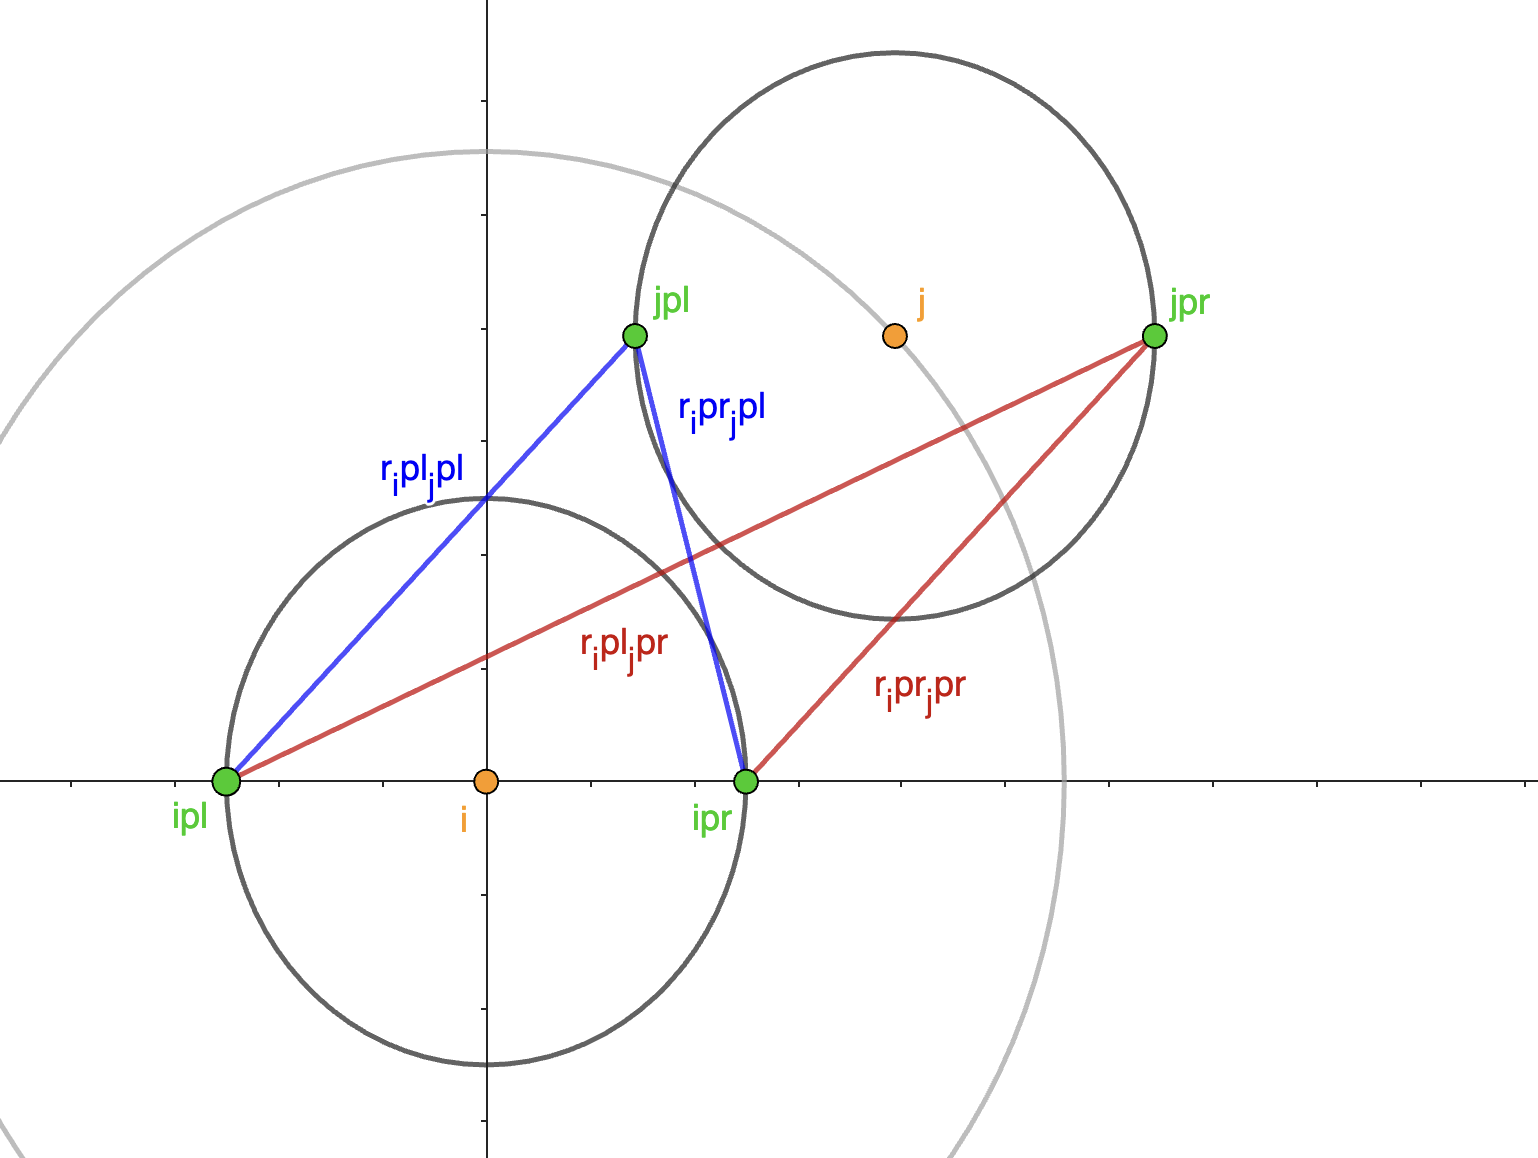

In [45]:
display(Image(filename='pictures_for_nb/patch_patch_45deg.png', width=400))

In [46]:
r_ipr_jpl = np.array([])  # smallest distance
r_ipl_jpr = np.array([])  # largest distance
offset_small = np.array([ - CONST_sigma, 0.0])  # offset for smallest distance r_ipr_jpl: - sigma (x-val)
offset_big = np.array([  CONST_sigma, 0.0])   # offset for the largest distance r_ipl_jpr = + sigma (x-val)
for alpha in CONST_alpha_lst:
    vect_r_ij = CONST_r_ij * np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])  
    # CONST_r_ij ... distance of part. centers
    # np.cos() & np.sin() needs the angle in radians!!
    r_ipr_jpl = np.append(r_ipr_jpl, np.linalg.norm(vect_r_ij + offset_small))
    r_ipl_jpr = np.append(r_ipl_jpr, np.linalg.norm(vect_r_ij + offset_big))

r_ipl_jpl = np.full(len(CONST_alpha_lst), CONST_r_ij)  
r_ipr_jpr = r_ipl_jpl

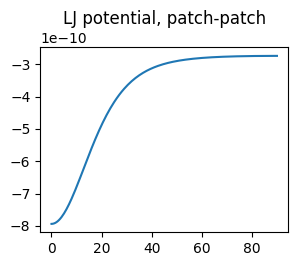

In [47]:
def compute_patch_patch(potential):
    epsilon = 1.0
    sigma = 0.01
    cutoff = 2.5
    
    pot_energy = np.array([]) # potential energy summed over all 4 patch-patch interactions

    for r_const_l, r_const_r, r_small, r_large, in zip(r_ipl_jpl, r_ipr_jpr, r_ipr_jpl, r_ipl_jpr):
        pot_energy_const_l = potential(r_const_l, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_const_r = potential(r_const_r, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_small = potential(r_small, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        pot_energy_large = potential(r_large, sigma=sigma, epsilon=epsilon, cutoff=cutoff)
        total_pot_energy = pot_energy_const_l + pot_energy_const_r + pot_energy_small + pot_energy_large

        pot_energy = np.append(pot_energy, total_pot_energy)
        #pot_energy = np.append(pot_energy, pot_energy_small)

    return pot_energy

my_plot(CONST_alpha_lst, compute_patch_patch(lj_cut), label='LJ potential, patch-patch')

# **2. Equatorial-Equatorial $\rightarrow$ Equatorial-Polar**